## Analyzing the Hague GTFS data

In [1]:
#loading required libraries

import sys
from pathlib import Path
import json

import pandas as pd
import numpy as np
import geopandas as gp
import matplotlib

import gtfs_kit as gk

import os
import zipfile

import osmnx as ox
ox.config(use_cache=True, log_console=True)

In [2]:
#setting GTFS data directory path for loading

DIR = Path('..')
print(DIR)
sys.path.append(str(DIR))
DATA_DIR = DIR/'gtfs_data/'

..


In [8]:
#loading GTFS data and list the feed components

#path = DATA_DIR/'netherlands-gtfs.zip'
path = DATA_DIR/'gtfs-openov-nl.zip'
gk.list_feed(path)

,file_name,file_size
0,agency.txt,2565
1,calendar_dates.txt,3761852
2,feed_info.txt,174
3,routes.txt,149010
4,shapes.txt,127577478
5,stop_times.txt,1002633724
6,stops.txt,2866473
7,trips.txt,65781990


In [9]:
#Describe feed details

feed = gk.read_feed(path, dist_units='km')
feed.describe()

,indicator,value
0,agencies,"[allGo (Keolis), Arriva, Bravo (Arriva), Bravo..."
1,timezone,Europe/Amsterdam
2,start_date,20201217
3,end_date,20210808
4,num_routes,2493
5,num_trips,930228
6,num_stops,46611
7,num_shapes,9155
8,sample_date,20201224
9,num_routes_active_on_sample_date,1974


In [10]:
feed.validate()

,type,message,table,rows
0,warning,Unrecognized column feed_id,feed_info,[]
1,warning,"Repeated pair (route_short_name, route_long_name)",routes,"[367, 368, 372, 505, 507, 517, 896, 1024, 1070..."
4,warning,Unrecognized column fare_units_traveled,stop_times,[]
5,warning,"Repeated pair (trip_id, departure_time)",stop_times,"[8974288, 4752998, 2651246, 561910, 4752999, 1..."
2,warning,Unrecognized column platform_code,stops,[]
3,warning,Stop has no stop times,stops,"[72, 6420, 10560, 11353, 11355, 11360, 11411, ..."
6,warning,Unrecognized column realtime_trip_id,trips,[]
7,warning,Unrecognized column trip_long_name,trips,[]


## Plotting the Netherlands GTFS data

In [5]:
with zipfile.ZipFile('../gtfs_data/gtfs-openov-nl.zip', 'r') as file:
    file.extractall('../gtfs_data/netherlands/')

os.listdir('../gtfs_data/netherlands')

['agency.txt',
 'calendar_dates.txt',
 'feed_info.txt',
 'routes.txt',
 'shapes.txt',
 'stops.txt',
 'stop_times.txt',
 'trips.txt']

In [11]:
import pandas as pd

trips = pd.read_csv('../gtfs_data/netherlands/trips.txt', low_memory=False)
shapes = pd.read_csv('../gtfs_data/netherlands/shapes.txt', low_memory=False)
routes = pd.read_csv('../gtfs_data/netherlands/routes.txt', low_memory=False)

In [3]:
trips.head()

,route_id,service_id,trip_id,realtime_trip_id,trip_headsign,trip_short_name,trip_long_name,direction_id,block_id,shape_id,wheelchair_accessible,bikes_allowed
0,60663,1,123151939,GVB:248:67,Houthavens,NaN,NaN,0,NaN,911191.0,1,NaN
1,60663,1,123151940,GVB:248:70,Houthavens,NaN,NaN,0,NaN,911191.0,1,NaN
2,60663,1,123151932,GVB:248:53,Houthavens,NaN,NaN,0,NaN,911191.0,1,NaN
3,60663,1,123151991,GVB:248:184,Centraal Station,NaN,NaN,1,NaN,911190.0,1,NaN
4,60663,1,123151909,GVB:248:6,Houthavens,NaN,NaN,0,NaN,911191.0,1,NaN


In [4]:
shapes.head()

,shape_id,shape_pt_sequence,shape_pt_lat,shape_pt_lon,shape_dist_traveled
0,899197,1,51.93779,4.33613,0
1,899197,2,51.93312,4.34160,1076
2,899197,4,51.93318,4.34167,1085
3,899197,5,51.93322,4.34171,1090
4,899197,6,51.93330,4.34192,1107


In [14]:
routes.head()

,route_id,agency_id,route_short_name,route_long_name,route_desc,route_type,route_color,route_text_color,route_url
0,73358,BRENG,78,Papendal - Beekdal Lyceum,NaN,3,NaN,NaN,NaN
1,75937,ARR,2,Brunssum/Hoensbroek via Heerlen - Bleijerheide,NaN,3,NaN,NaN,NaN
2,67394,IFF:NS,Intercity,Den Haag Centraal <-> Eindhoven Centraal IC1100,NaN,2,NaN,NaN,NaN
3,67395,IFF:NS,Intercity,Nachtnettrein Rotterdam Centraal <-> Eindhoven...,NaN,2,NaN,NaN,NaN
4,67396,IFF:RNET,Stopbus i.p.v. trein,Stopbus i.p.v. trein Dordrecht <-> Geldermalsen,NaN,3,NaN,NaN,NaN


In [16]:
routes.route_type.unique().tolist()

#0 - Tram, Streetcar, Light rail. Any light rail or street level system within a metropolitan area.
#1 - Subway, Metro. Any underground rail system within a metropolitan area.
#2 - Rail. Used for intercity or long-distance travel.
#3 - Bus. Used for short- and long-distance bus routes.
#4 - Ferry. Used for short- and long-distance boat service.

# More details at https://developers.google.com/transit/gtfs/reference#tripstxt

[3, 2, 0, 1, 4]

In [5]:
num_trips_by_shape = trips.groupby('shape_id').aggregate({'route_id': 'count'}).reset_index()
num_trips_by_shape.rename({'route_id': 'trip_count'}, axis='columns', inplace=True)

shapes_with_nums = shapes.merge(num_trips_by_shape, on='shape_id')
shapes_with_nums.head()

,shape_id,shape_pt_sequence,shape_pt_lat,shape_pt_lon,shape_dist_traveled,trip_count
0,899197,1,51.93779,4.33613,0,146
1,899197,2,51.93312,4.34160,1076,146
2,899197,4,51.93318,4.34167,1085,146
3,899197,5,51.93322,4.34171,1090,146
4,899197,6,51.93330,4.34192,1107,146


In [6]:
from datashader.utils import lnglat_to_meters
import numpy as np

shapes_with_nums['coord_x'], shapes_with_nums['coord_y'] = \
    lnglat_to_meters(shapes_with_nums['shape_pt_lon'], shapes_with_nums['shape_pt_lat'])

def split_df_by(df, byvar):
    df_parts = []
    for level, df_part in df.groupby(byvar):
        empty = pd.DataFrame([[level if colname == byvar else np.NaN for colname in df.columns]],
                             columns=df.columns)
        df_parts.append(df_part.append(empty))
    return pd.concat(df_parts) 

sep_shapes = split_df_by(shapes_with_nums, 'shape_id')

In [26]:
import bokeh.plotting as bp
from bokeh.models.tiles import WMTSTileSource
import datashader as ds
import datashader.transfer_functions as tf
from datashader.bokeh_ext import InteractiveImage
from datashader.utils import export_image
import colorcet as cc
import os

bp.output_notebook()

x_range=(0.3e6, 1.155e6)
y_range=(4.994e6, 8.052e6)

if not os.path.exists('./img'):
    os.mkdir('./img')
p = bp.figure(tools='pan,wheel_zoom,reset',
              plot_width=int(600),
              plot_height=int(600),
              x_range=x_range,
              y_range=y_range)

p.axis.visible = False
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

url = "https://cartodb-basemaps-b.global.ssl.fastly.net/dark_all/{z}/{x}/{y}.png"
tile_renderer = p.add_tile(WMTSTileSource(url=url))
tile_renderer.alpha = 1

def image_callback(x_range, y_range, w, h, color_fn=tf.shade):
    cvs = ds.Canvas(plot_width=w, plot_height=h, x_range=x_range, y_range=y_range)
    agg = cvs.line(sep_shapes, 'coord_x', 'coord_y', agg=ds.sum('trip_count'))
    image = tf.shade(agg, cmap=cc.fire, how='eq_hist')
    return image

export_image(image_callback(x_range=x_range, y_range=y_range, w=2000, h=2000),
             filename="BUD_schedule_fire", background='black')
InteractiveImage(p, image_callback)

Loading BokehJS ...

C:\Users\srijith\anaconda3\envs\geo_env\lib\site-packages\datashader\bokeh_ext.py:233: VisibleDeprecationWarning: InteractiveImage has been deprecated as of datashader 0.8.0. It is not supported in JupyterLab and Bokeh server environments. Please use the HoloViews datashader integration instead.
  warnings.warn('InteractiveImage has been deprecated as of datashader 0.8.0. '


## Filtering Public Transit Lines that are within or pass through Hague

<AxesSubplot:>

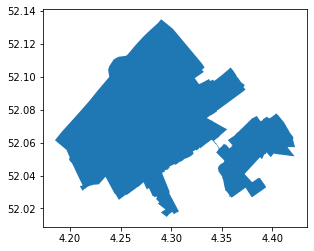

In [2]:
#Download Hague map from Openstreetmaps

# define the place query
query = {'city': 'Den Haag'}

# get the boundaries of the place
gdf = ox.geocode_to_gdf(query)
gdf.plot()

In [3]:
from shapely.geometry import Point

geom = gdf.loc[0, 'geometry']

# get the bounding box of the city
#geom.bounds

# determine if a point is within the city boundary
coords = (4.281028, 52.073533)
geom.intersects(Point(coords))

True

In [4]:
stops = pd.read_csv('../gtfs_data/netherlands/stops.txt', low_memory=False)

In [5]:
stops.head()

,stop_id,stop_code,stop_name,stop_lat,stop_lon,location_type,parent_station,stop_timezone,wheelchair_boarding,platform_code
0,1,NaN,"Arnhem, Station Presikhaaf",51.987910,5.941563,0,NaN,NaN,1.0,NaN
1,10,NaN,"Doesburg, Tunnel Angerlo",51.997992,6.129636,0,NaN,NaN,1.0,NaN
2,1004,NaN,"Warnsveld, GGNet",52.131585,6.249971,0,NaN,NaN,1.0,NaN
3,1007,NaN,"Rheden, Oranjeweg",52.002476,6.032238,0,NaN,NaN,1.0,NaN
4,1013214,NaN,"Assen, Triade",52.998037,6.558162,0,NaN,NaN,0.0,NaN


In [6]:
#filtering transit stations within Hague
hague_stations = []

for index, row in stops.iterrows():
    coords = (stops.stop_lon[index], stops.stop_lat[index])
    if geom.intersects(Point(coords)) == True:
        hague_stations.append(stops.stop_id[index])
    

In [15]:
len(hague_stations)

966

In [4]:
#Creating the stops.txt file for Hague GTFS
#hague_stops = stops[stops['stop_id'].isin(hague_stations)]
#hague_stops.to_csv('C:/Users/srijith/Documents/GitHub/public-transit-system/gtfs_data/hague/stops.txt', header=True, index=False, sep=',')

hague_stops = pd.read_csv('C:/Users/srijith/Documents/GitHub/public-transit-system/gtfs_data/hague/stops.txt', sep=',')
hague_stops.tail()

,stop_id,stop_code,stop_name,stop_lat,stop_lon,location_type,parent_station,stop_timezone,wheelchair_boarding,platform_code
961,NL:S:32002601,NaN,"Den Haag, Centraal Station",52.080755,4.323157,1,NaN,Europe/Amsterdam,0.0,NaN
962,NL:S:32002605,NaN,"Den Haag, Centraal Station",52.081113,4.324228,1,NaN,Europe/Amsterdam,0.0,NaN
963,NL:S:32002609,NaN,"Den Haag, Centraal Station",52.080553,4.324952,1,NaN,Europe/Amsterdam,0.0,NaN
964,NL:S:32002719,NaN,"Den Haag, Station Hollands Spoor",52.070328,4.322084,1,NaN,Europe/Amsterdam,0.0,NaN
965,NL:S:32003846,NaN,"Den Haag, Station Hollands Spoor",52.068581,4.322572,1,NaN,Europe/Amsterdam,0.0,NaN


In [40]:
#Creating the stop_times.txt for Hague GTFS
stop_times = pd.read_csv('../gtfs_data/netherlands/stop_times.txt', low_memory=False)
stop_times['stop_id'] = stop_times['stop_id'].astype(str)
stop_times.head()

,trip_id,stop_sequence,stop_id,stop_headsign,arrival_time,departure_time,pickup_type,drop_off_type,timepoint,shape_dist_traveled,fare_units_traveled
0,123996698,14,2337695,NaN,20:58:03,20:58:03,0,0,0,18229.0,18229
1,123996698,3,2335278,NaN,20:35:11,20:35:11,0,0,0,847.0,847
2,123996698,1,2335260,NaN,20:34:00,20:34:00,0,1,1,0.0,0
3,123996697,14,2337695,NaN,19:58:03,19:58:03,0,0,0,18229.0,18229
4,123996697,3,2335278,NaN,19:35:11,19:35:11,0,0,0,847.0,847


In [44]:
trip_list = stop_times.trip_id.unique()
#trip_list = [125353018]
print(trip_list)
print(len(trip_list))

[123996698 123996697 122482725 ... 125587071 125587097 125587111]
930228


In [45]:
hague_trips = []
for index, trip in enumerate(trip_list):
    curr_service = stop_times[stop_times.trip_id == trip]
    
    #print(curr_service.stop_id)
    #print(curr_service.stop_id.isin(hague_stops.stop_id).any())
    
    if curr_service['stop_id'].isin(hague_stops.stop_id).any():
        hague_trips.append(trip)

    if index % 500 == 0:
        print(index, len(hague_trips))
    
print(len(hague_trips))

0 0
500 143
1000 153
1500 156
2000 191
2500 215
3000 331
3500 340
4000 345
4500 357
5000 381
5500 391
6000 404
6500 436
7000 446
7500 531
8000 542
8500 564
9000 583
9500 612
10000 641
10500 648
11000 680
11500 733
12000 737
12500 743
13000 756
13500 815
14000 840
14500 948
15000 951
15500 989
16000 1037
16500 1125
17000 1149
17500 1157
18000 1168
18500 1278
19000 1288
19500 1296
20000 1410
20500 1414
21000 1425
21500 1433
22000 1477
22500 1524
23000 1544
23500 1627
24000 1646
24500 1773
25000 1793
25500 1801
26000 1812
26500 1886
27000 1891
27500 1913
28000 1920
28500 2010
29000 2030
29500 2042
30000 2042
30500 2051
31000 2069
31500 2081
32000 2089
32500 2214
33000 2249
33500 2355
34000 2367
34500 2390
35000 2392
35500 2440
36000 2511
36500 2512
37000 2542
37500 2575
38000 2647
38500 2648
39000 2652
39500 2652
40000 2654
40500 2657
41000 2744
41500 2748
42000 2770
42500 2863
43000 2921
43500 2933
44000 2941
44500 2968
45000 3108
45500 3132
46000 3139
46500 3149
47000 3163
47500 3192
48

In [6]:
#hague_stop_times = stop_times[stop_times['trip_id'].isin(hague_trips)]
#hague_stop_times.to_csv('C:/Users/srijith/Documents/GitHub/public-transit-system/gtfs_data/hague/stop_times.txt', header=True, index=False, sep=',')

hague_stop_times = pd.read_csv('C:/Users/srijith/Documents/GitHub/public-transit-system/gtfs_data/hague/stop_times.txt', sep=',')
hague_stop_times.head()

,trip_id,stop_sequence,stop_id,stop_headsign,arrival_time,departure_time,pickup_type,drop_off_type,timepoint,shape_dist_traveled,fare_units_traveled
0,125353031,15,2064758,Leiden Centraal,15:35:34,15:35:34,0,0,0,6235.0,6261
1,125353025,15,2064758,Leiden Centraal,14:06:34,14:06:34,0,0,0,6235.0,6261
2,125353018,36,2065338,Den Haag Centraal,12:21:17,12:21:17,0,0,0,14236.0,14144
3,125353018,33,2064861,Den Haag Centraal,12:17:45,12:17:45,0,0,0,12331.0,12252
4,125353018,28,2065171,Den Haag Centraal,12:13:31,12:13:31,0,0,0,10440.0,10366


In [9]:
#Creating trips.txt for Hague
#trips = pd.read_csv('../gtfs_data/netherlands/trips.txt', low_memory=False)

#hague_trips = trips[trips['trip_id'].isin(hague_trips)]
#hague_trips.to_csv('C:/Users/srijith/Documents/GitHub/public-transit-system/gtfs_data/hague/trips.txt', header=True, index=False, sep=',')

hague_trips = pd.read_csv('C:/Users/srijith/Documents/GitHub/public-transit-system/gtfs_data/hague/trips.txt', sep=',')

hague_trips = pd.read_csv('C:/Users/srijith/Documents/GitHub/public-transit-system/gtfs_data/hague/trips.txt', sep=',')
hague_trips.head()

,route_id,service_id,trip_id,realtime_trip_id,trip_headsign,trip_short_name,trip_long_name,direction_id,block_id,shape_id,wheelchair_accessible,bikes_allowed
0,66242,542,125353031,EBS:3043:1039,Leiden via Wassenaar,NaN,NaN,0,NaN,906661.0,1,NaN
1,66242,542,125353044,EBS:3043:1052,Den Haag via Wassenaar,NaN,NaN,1,NaN,947823.0,1,NaN
2,66242,542,125353025,EBS:3043:1033,Leiden via Wassenaar,NaN,NaN,0,NaN,906661.0,1,NaN
3,66242,542,125353018,EBS:3043:1026,Den Haag via Wassenaar,NaN,NaN,1,NaN,947823.0,1,NaN
4,63412,793,123440481,HTM:6:60096,Den Haag Leyenburg,NaN,NaN,1,NaN,945373.0,2,NaN


In [8]:
#Creating trips.txt for Hague
#calender_dates = pd.read_csv('../gtfs_data/netherlands/calendar_dates.txt', low_memory=False)

#hague_calendar = calender_dates[calender_dates['service_id'].isin(hague_trips.service_id)]
#hague_calendar.to_csv('C:/Users/srijith/Documents/GitHub/public-transit-system/gtfs_data/hague/calender_dates.txt', header=True, index=False, sep=',')

hague_calendar = pd.read_csv('C:/Users/srijith/Documents/GitHub/public-transit-system/gtfs_data/hague/calender_dates.txt', sep=',')
hague_calendar.head()

,service_id,date,exception_type
0,1,20201217,1
1,2,20201217,1
2,2,20210114,1
3,2,20210121,1
4,2,20210128,1


In [17]:
#Creating routes.txt for hague
hague_routes_list = hague_trips.route_id.unique()
hague_routes_list[0:10]

array([66242, 63412, 63410, 65896, 75941, 75940, 65637, 65638, 65891,
       17705], dtype=int64)

In [19]:
routes = pd.read_csv('../gtfs_data/netherlands/routes.txt', low_memory=False)
routes.head()

,route_id,agency_id,route_short_name,route_long_name,route_desc,route_type,route_color,route_text_color,route_url
0,73358,BRENG,78,Papendal - Beekdal Lyceum,NaN,3,NaN,NaN,NaN
1,75937,ARR,2,Brunssum/Hoensbroek via Heerlen - Bleijerheide,NaN,3,NaN,NaN,NaN
2,67394,IFF:NS,Intercity,Den Haag Centraal <-> Eindhoven Centraal IC1100,NaN,2,NaN,NaN,NaN
3,67395,IFF:NS,Intercity,Nachtnettrein Rotterdam Centraal <-> Eindhoven...,NaN,2,NaN,NaN,NaN
4,67396,IFF:RNET,Stopbus i.p.v. trein,Stopbus i.p.v. trein Dordrecht <-> Geldermalsen,NaN,3,NaN,NaN,NaN


In [20]:
hague_routes = routes[routes['route_id'].isin(hague_routes_list)]
hague_routes.to_csv('C:/Users/srijith/Documents/GitHub/public-transit-system/gtfs_data/hague/routes.txt', header=True, index=False, sep=',')

hague_routes = pd.read_csv('C:/Users/srijith/Documents/GitHub/public-transit-system/gtfs_data/hague/routes.txt', sep=',')
hague_routes.head()

,route_id,agency_id,route_short_name,route_long_name,route_desc,route_type,route_color,route_text_color,route_url
0,67394,IFF:NS,Intercity,Den Haag Centraal <-> Eindhoven Centraal IC1100,NaN,2,NaN,NaN,NaN
1,67399,IFF:NS,Intercity,Den Haag Centraal <-> Amersfoort Centraal IC2000,NaN,2,NaN,NaN,NaN
2,67402,IFF:NS,Intercity,Nachtnettrein Utrecht Centraal <-> Rotterdam C...,NaN,2,NaN,NaN,NaN
3,75940,HTM,2,Lijn Kraaijenstein - Leidschendam Leidsenhage,NaN,0,NaN,NaN,https://www.htm.nl/reisinformatie/tram-2
4,75941,HTM,19,Lijn Delft Noord - Leidschendam leidsenhage,NaN,0,NaN,NaN,https://www.htm.nl/reisinformatie/tram-19


In [21]:
#creating agency.txt for hague
hague_agency_list = hague_routes.agency_id.unique()
hague_agency_list[0:10]

array(['IFF:NS', 'HTM', 'ARR', 'EBS', 'RET'], dtype=object)

In [22]:
agency = pd.read_csv('../gtfs_data/netherlands/agency.txt', low_memory=False)
agency.head()

,agency_id,agency_name,agency_url,agency_fare_url,agency_timezone,agency_phone
0,ALLGO,allGo (Keolis),http://www.allgobus.nl,NaN,Europe/Amsterdam,003188-0331360
1,ARR,Arriva,https://www.arriva.nl,https://www.arriva.nl/eticket,Europe/Amsterdam,0031900-2022022
2,BRAVO:ARR,Bravo (Arriva),http://www.bravo.info,https://www.arriva.nl/eticket,Europe/Amsterdam,0031800-0232545
3,BRAVO:CXX,Bravo (Hermes),http://www.bravo.info,https://eticket.connexxion.nl/,Europe/Amsterdam,0031800-0222277
4,BRENG,Breng,http://www.breng.nl,NaN,Europe/Amsterdam,003126-2142140


In [23]:
hague_agency = agency[agency['agency_id'].isin(hague_agency_list)]
hague_agency.to_csv('C:/Users/srijith/Documents/GitHub/public-transit-system/gtfs_data/hague/agency.txt', header=True, index=False, sep=',')

hague_agency = pd.read_csv('C:/Users/srijith/Documents/GitHub/public-transit-system/gtfs_data/hague/agency.txt', sep=',')
hague_agency.head()

,agency_id,agency_name,agency_url,agency_fare_url,agency_timezone,agency_phone
0,ARR,Arriva,https://www.arriva.nl,https://www.arriva.nl/eticket,Europe/Amsterdam,0031900-2022022
1,EBS,EBS,http://www.ebs-ov.nl,NaN,Europe/Amsterdam,0031800-0327
2,HTM,HTM,http://www.htm.nl,NaN,Europe/Amsterdam,0031900-4864636
3,IFF:NS,NS,http://www.ns.nl,http://www.ns.nl/eticket,Europe/Amsterdam,003130-7515155
4,RET,RET,http://www.ret.nl,NaN,Europe/Amsterdam,0031900-5006010


In [24]:
#Creating shapes.txt for hague
hague_shapes_list = hague_trips.shape_id.unique()
hague_shapes_list[0:10]

array([906661., 947823., 945373., 945372., 945350., 945352., 936672.,
       906789., 906791., 936673.])

In [25]:
shapes = pd.read_csv('../gtfs_data/netherlands/shapes.txt', low_memory=False)
shapes.head()

,shape_id,shape_pt_sequence,shape_pt_lat,shape_pt_lon,shape_dist_traveled
0,899197,1,51.93779,4.33613,0
1,899197,2,51.93312,4.34160,1076
2,899197,4,51.93318,4.34167,1085
3,899197,5,51.93322,4.34171,1090
4,899197,6,51.93330,4.34192,1107


In [26]:
hague_shapes = agency[agency['agency_id'].isin(hague_shapes_list)]
hague_shapes.to_csv('C:/Users/srijith/Documents/GitHub/public-transit-system/gtfs_data/hague/shapes.txt', header=True, index=False, sep=',')

hague_shapes = pd.read_csv('C:/Users/srijith/Documents/GitHub/public-transit-system/gtfs_data/hague/shapes.txt', sep=',')
hague_shapes.head()

,agency_id,agency_name,agency_url,agency_fare_url,agency_timezone,agency_phone
